In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
dataset = pd.read_excel('Naval_Propulsion_Plants.xlsx')
dataset.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
x = dataset.iloc[:,0:16].values
y = dataset.iloc[:,16].values

In [5]:
np.shape(x)

(11934, 16)

<AxesSubplot:>

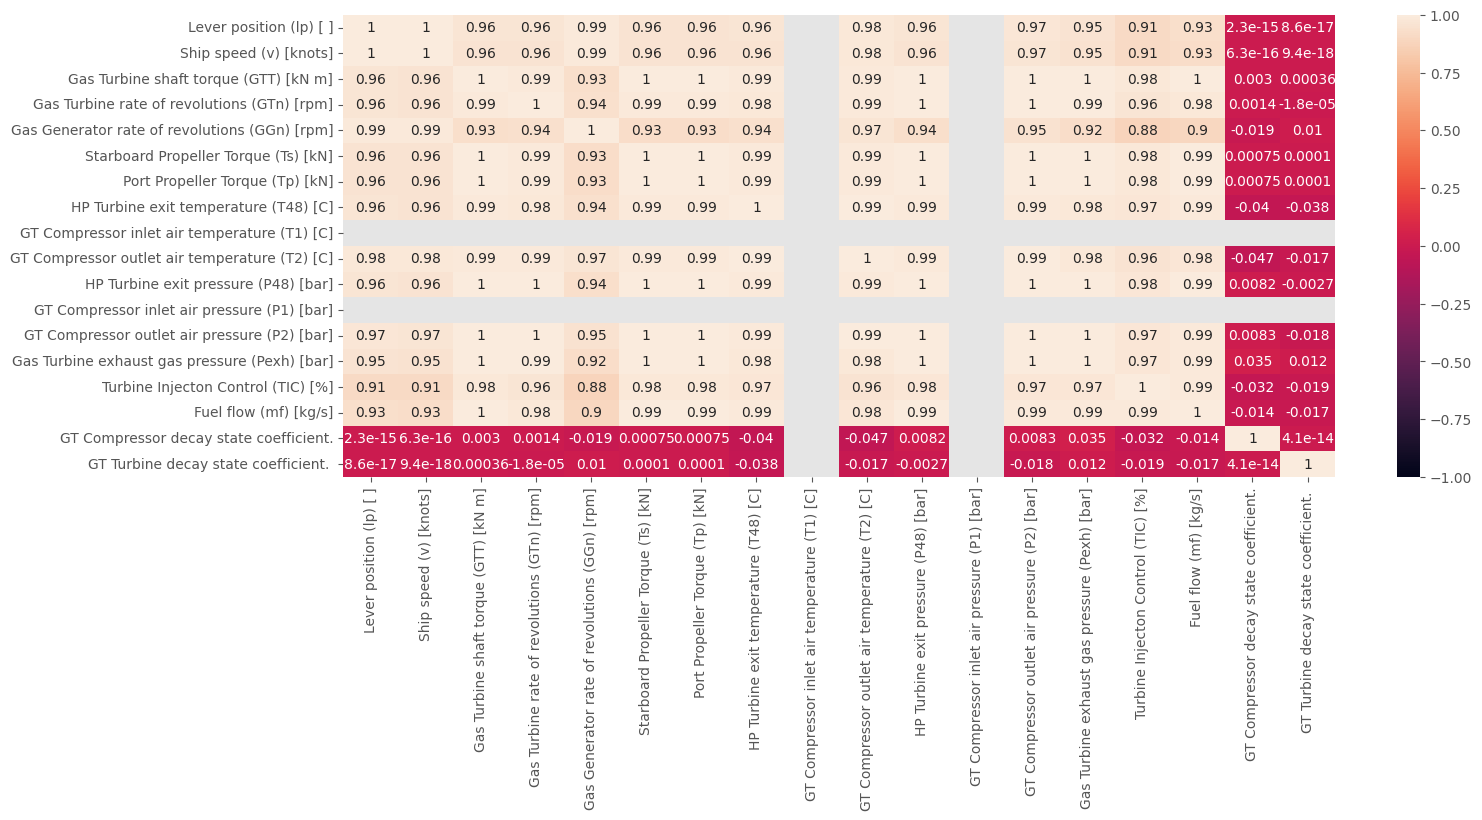

In [17]:
plt.figure(figsize=(16, 6))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

## Ordinary Least Square

In [122]:
regressor_OLS = LinearRegression()
regressor_OLS.fit(x_train, y_train)
predict_OLS = regressor_OLS.predict(x_test)
predict_OLS

array([0.99306879, 0.9536655 , 0.99278065, ..., 0.98929885, 0.98174002,
       0.98026981])

In [123]:
y_test

array([0.988, 0.952, 0.985, ..., 0.994, 0.982, 0.97 ])

MAE_OLS =0.004642757535696483
MSE_OLS =3.4884776789968056e-05


Text(0.5, 0, 'Error')

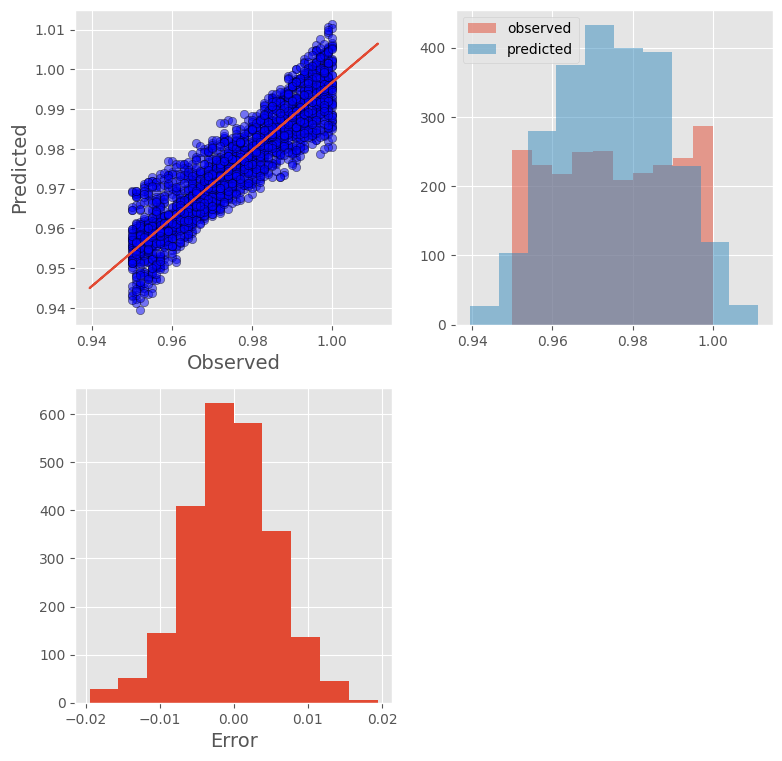

In [147]:
plt.style.use('default')
plt.style.use('ggplot')

a, b = np.polyfit(y_test, predict_OLS, 1)
residual = y_test - predict_OLS
MAE_OLS = np.mean(abs(residual))
MSE_OLS = np.mean(residual ** 2)
print('MAE_OLS =' + str(MAE_OLS))
print('MSE_OLS =' + str(MSE_OLS))

plt.figure(figsize=(9,9))
ax = plt.subplot(2,2,1)
ax.scatter(y_test, predict_OLS, edgecolor='k', facecolor='blue', alpha=0.5)
ax.plot(predict_OLS, a*predict_OLS+b)
ax.set_ylabel('Predicted', fontsize=14)
ax.set_xlabel('Observed', fontsize=14)

ax = plt.subplot(2,2,2)
ax.hist(y_test, alpha = 0.5)
ax.hist(predict_OLS, alpha = 0.5)
ax.legend(['observed', 'predicted'])

ax = plt.subplot(2,2,3)
ax.hist(residual)
ax.set_xlabel('Error', fontsize=14)

## boxcox

0.9328864108976184


array([0.99307291, 0.95367377, 0.99278379, ..., 0.98929756, 0.98173328,
       0.98026391])

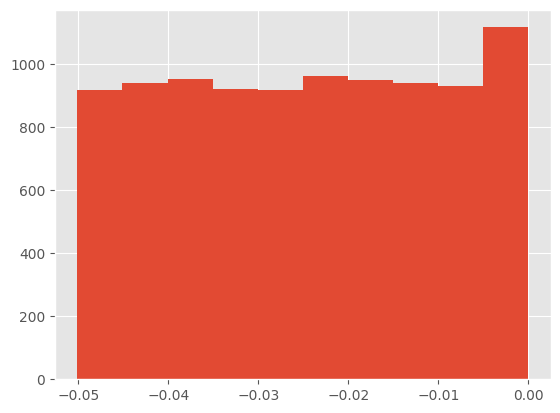

In [125]:
fitted_data, fitted_lambda = stats.boxcox(y_train)
#plt.hist(fitted_data)
print(fitted_lambda)
#predict_Boxcox = (predict_OLS ** fitted_lambda - 1) / fitted_lambda
#print(predict_`Boxcox)
plt.hist(fitted_data)

regressor_Boxcox = LinearRegression()
regressor_Boxcox.fit(x_train, fitted_data)
predict_Boxcox_before = regressor_Boxcox.predict(x_test)
predict_Boxcox = np.power(predict_Boxcox_before * fitted_lambda + 1, (1/fitted_lambda))
predict_Boxcox

MAE_OLS =0.004643415164288491
MSE_OLS =3.488749516162515e-05
MAPE_OLS =0.004643415164288491


Text(0.5, 0, 'Error')

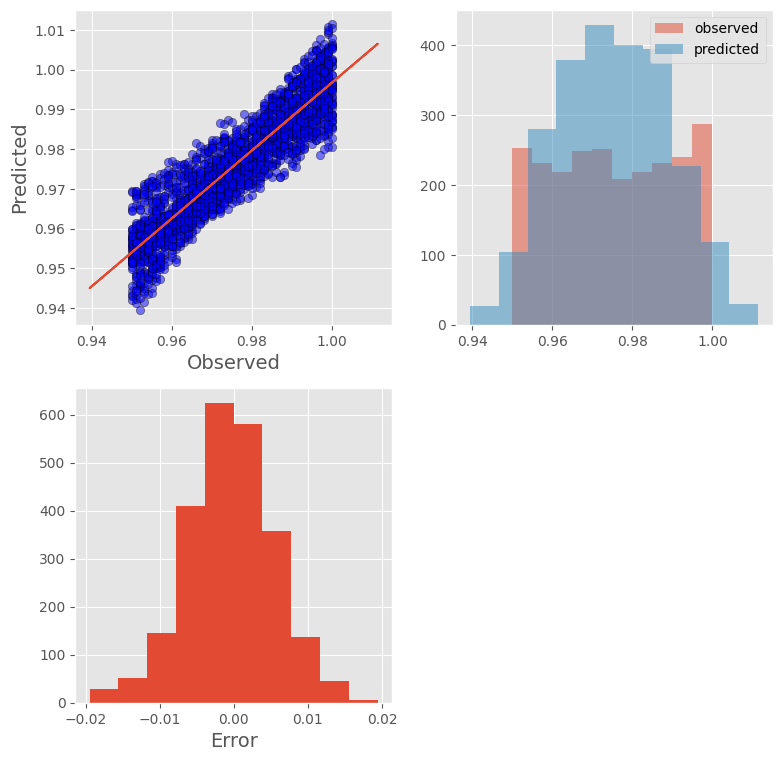

In [126]:
plt.style.use('default')
plt.style.use('ggplot')

a, b = np.polyfit(y_test, predict_Boxcox, 1)
residual = y_test - predict_Boxcox
MAE_OLS = np.mean(abs(residual))
MSE_OLS = np.mean(residual ** 2)
MAPE_OLS = np.mean(abs(residual) / max(y_test))
print('MAE_OLS =' + str(MAE_OLS))
print('MSE_OLS =' + str(MSE_OLS))
print('MAPE_OLS =' + str(MAPE_OLS))


plt.figure(figsize=(9,9))
ax = plt.subplot(2,2,1)
ax.scatter(y_test, predict_Boxcox, edgecolor='k', facecolor='blue', alpha=0.5)
ax.plot(predict_Boxcox, a*predict_Boxcox+b)
ax.set_ylabel('Predicted', fontsize=14)
ax.set_xlabel('Observed', fontsize=14)

ax = plt.subplot(2,2,2)
ax.hist(y_test, alpha = 0.5)
ax.hist(predict_Boxcox, alpha = 0.5)
ax.legend(['observed', 'predicted'])

ax = plt.subplot(2,2,3)
ax.hist(residual)
ax.set_xlabel('Error', fontsize=14)

## Weighted Least square

In [127]:
regressor_WLS = LinearRegression()
# RuntimeWarning: divide by zero encountered in true_divide
mean_x = np.mean(x_train)
x_train_mod = x_train + mean_x * 0.001
quad_weight = [np.mean(1/x_set**2) for x_set in x_train_mod]

regressor_WLS.fit(x_train, y_train, sample_weight=quad_weight)
predict_WLS = regressor_WLS.predict(x_test)
predict_WLS


array([0.99490528, 0.95357453, 0.99461652, ..., 0.98890284, 0.98161699,
       0.97967208])

In [128]:
y_test

array([0.988, 0.952, 0.985, ..., 0.994, 0.982, 0.97 ])

MAE_WLS =0.004826999111700595
MSE_WLS =3.649101032559597e-05
MAPE_WLS =0.004826999111700595


Text(0.5, 0, 'Error')

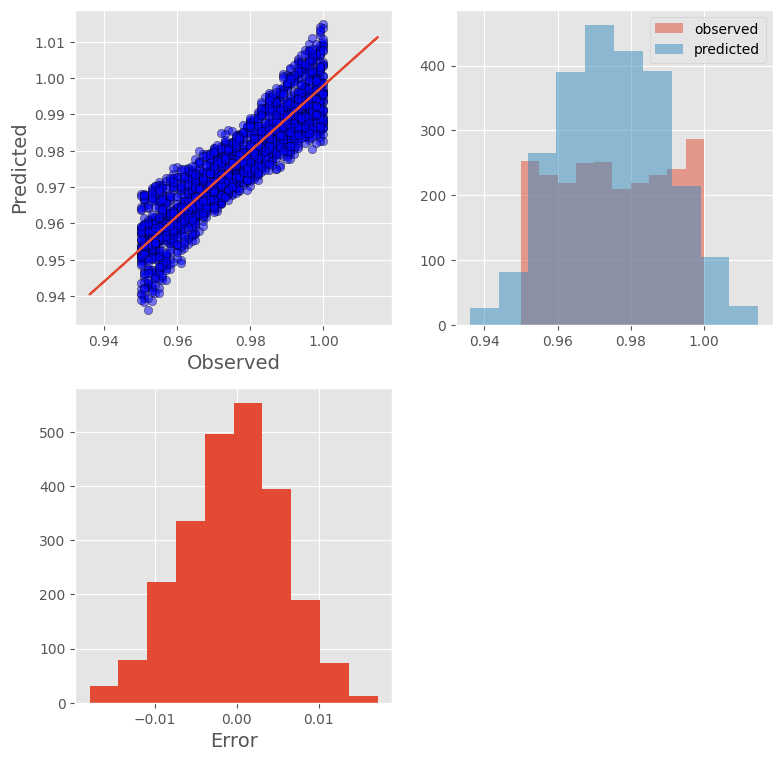

In [129]:
plt.style.use('default')
plt.style.use('ggplot')

a, b = np.polyfit(y_test, predict_WLS, 1)
residual = y_test - predict_WLS
MAE_WLS = np.mean(abs(residual))
MSE_WLS = np.mean(residual ** 2)
MAPE_WLS = np.mean(abs(residual) / max(y_test))
print('MAE_WLS =' + str(MAE_WLS))
print('MSE_WLS =' + str(MSE_WLS))
print('MAPE_WLS =' + str(MAPE_WLS))

plt.figure(figsize=(9,9))
ax = plt.subplot(2,2,1)
ax.scatter(y_test, predict_WLS, edgecolor='k', facecolor='blue', alpha=0.5)
ax.plot(predict_WLS, a*predict_WLS+b)
ax.set_ylabel('Predicted', fontsize=14)
ax.set_xlabel('Observed', fontsize=14)

ax = plt.subplot(2,2,2)
ax.hist(y_test, alpha = 0.5)
ax.hist(predict_WLS, alpha = 0.5)
ax.legend(['observed', 'predicted'])

ax = plt.subplot(2,2,3)
ax.hist(residual)
ax.set_xlabel('Error', fontsize=14)

## lasso

In [7]:
#Lassoo = Lasso()
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#grid = dict()
#grid['alpha'] = np.arange(0, 1, 0.01)
# define search
#search = GridSearchCV(Lassoo, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
#results = search.fit(x, y)
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

regressor_Lasso = Lasso(alpha=1.)
regressor_Lasso.fit(x_train, y_train)
predict_Lasso = regressor_Lasso.predict(x_test)
predict_Lasso

array([0.97501058, 0.97501063, 0.9749433 , ..., 0.97502899, 0.97504519,
       0.9750716 ])

MAE_WLS =0.012852163979140702
MSE_WLS =0.000220145775680865


Text(0.5, 0, 'Error')

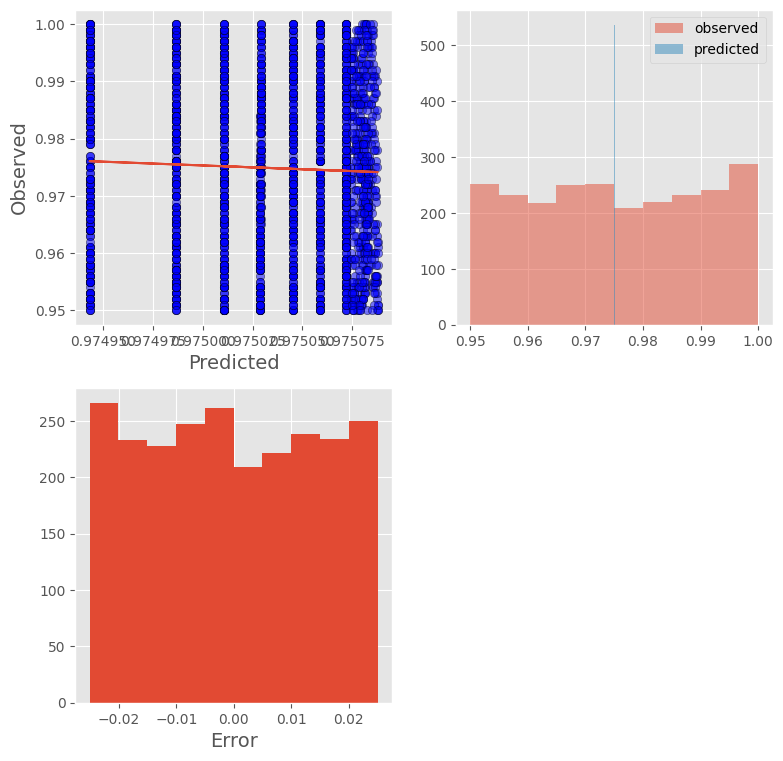

In [8]:
plt.style.use('default')
plt.style.use('ggplot')

a, b = np.polyfit(predict_Lasso, y_test,  1)
residual = y_test - predict_Lasso
MAE_WLS = np.mean(abs(residual))
MSE_WLS = np.mean(residual ** 2)
print('MAE_WLS =' + str(MAE_WLS))
print('MSE_WLS =' + str(MSE_WLS))

plt.figure(figsize=(9,9))
ax = plt.subplot(2,2,1)
ax.scatter(predict_Lasso, y_test, edgecolor='k', facecolor='blue', alpha=0.5)
ax.plot(predict_Lasso, a*predict_Lasso+b)
ax.set_ylabel('Observed', fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)

ax = plt.subplot(2,2,2)
ax.hist(y_test, alpha = 0.5)
ax.hist(predict_Lasso, alpha = 0.5)
ax.legend(['observed', 'predicted'])

ax = plt.subplot(2,2,3)
ax.hist(residual)
ax.set_xlabel('Error', fontsize=14)

## Elastic Net

In [167]:
elnet = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(elnet, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

regressor_elnet = ElasticNet(alpha=0.)
regressor_elnet.fit(x_train, y_train)
predict_elnet = regressor_elnet.predict(x_test)
predict_elnet

c:\users\acer\pycharmprojects\ie2065\ven\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
c:\users\acer\pycharmprojects\ie2065\ven\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MAE: -0.006
Config: {'alpha': 0.0}


c:\users\acer\pycharmprojects\ie2065\ven\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.297e-01, tolerance: 2.586e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ACER\AppData\Local\Temp/ipykernel_12216/2068915197.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regressor_elnet.fit(x_train, y_train)
c:\users\acer\pycharmprojects\ie2065\ven\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  mode

array([0.99606683, 0.96542078, 0.98641976, ..., 0.9811644 , 0.98033275,
       0.97601496])

## Ridge

In [9]:
#ridgee = Ridge()
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#grid = dict()
#grid['alpha'] = np.arange(0, 1, 0.01)
# define search
#search = GridSearchCV(ridgee, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
#results = search.fit(x, y)
# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

regressor_ridge = Ridge(alpha=0)
regressor_ridge.fit(x_train, y_train)
predict_ridge = regressor_ridge.predict(x_test)
predict_ridge

array([0.9916358 , 0.95647955, 0.9916358 , ..., 0.98968267, 0.98187017,
       0.98089361])

0.004756595205651407


Text(0.5, 0, 'Error')

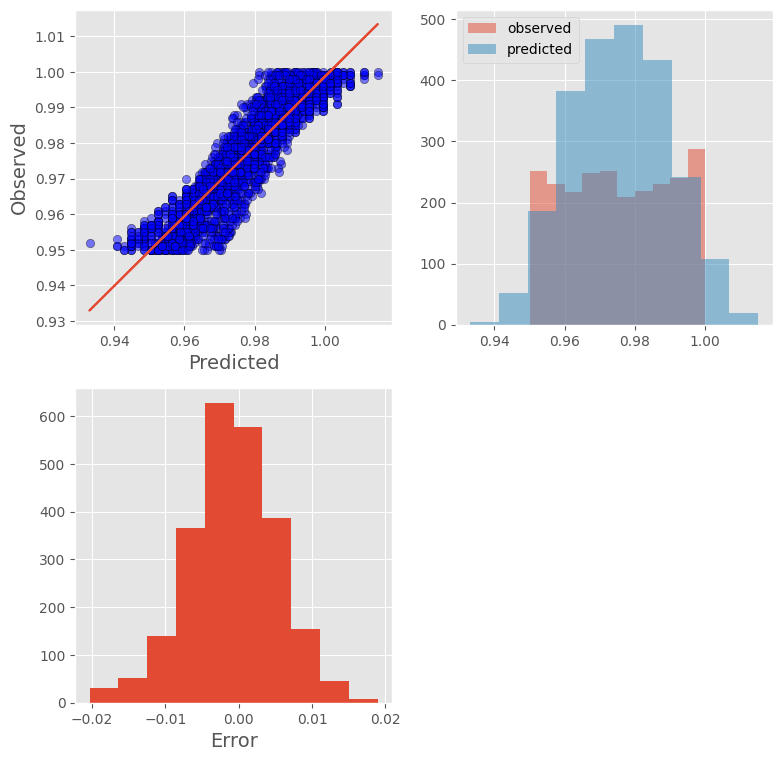

In [11]:
plt.style.use('default')
plt.style.use('ggplot')

a, b = np.polyfit(predict_ridge, y_test,  1)
residual = y_test - predict_ridge
MAE_ridge = np.mean(abs(y_test - predict_ridge))
print(MAE_ridge)

plt.figure(figsize=(9,9))
ax = plt.subplot(2,2,1)
ax.scatter(predict_ridge, y_test, edgecolor='k', facecolor='blue', alpha=0.5)
ax.plot(predict_ridge, a*predict_ridge+b)
ax.set_ylabel('Observed', fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)

ax = plt.subplot(2,2,2)
ax.hist(y_test, alpha = 0.5)
ax.hist(predict_ridge, alpha = 0.5)
ax.legend(['observed', 'predicted'])

ax = plt.subplot(2,2,3)
ax.hist(residual)
ax.set_xlabel('Error', fontsize=14)

### Neural Network

In [6]:
y_train_n = np.reshape(y_train, (-1,1))
y_test_n = np.reshape(y_test, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x_train))
xtrain_scale=scaler_x.transform(x_train)
print(scaler_x.fit(x_test))
xtest_scale=scaler_x.transform(x_test)
print(scaler_y.fit(y_train_n))
ytrain_scale=scaler_y.transform(y_train_n)
print(scaler_y.fit(y_test_n))
ytest_scale=scaler_y.transform(y_test_n)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [11]:
# Model Configuration
NN = tf.keras.Sequential()
NN.add(tf.keras.layers.Dense(16, input_dim=16, kernel_initializer='normal', activation='relu'))
# Training Data Samples/Factor * (Input Neurons + Output Neurons)
NN.add(tf.keras.layers.Dense(32, activation='relu'))
NN.add(tf.keras.layers.Dense(1))
NN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


In [12]:
opt = tf.keras.optimizers.Adam(0.01)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5)
NN.compile(loss='mse', optimizer=opt, metrics=['mse','mae'])
history=NN.fit(xtrain_scale, ytrain_scale, epochs=250, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/250
51/51 [==============================] - 0s 3ms/step - loss: 0.1022 - mse: 0.1022 - mae: 0.2702 - val_loss: 0.0851 - val_mse: 0.0851 - val_mae: 0.2526
Epoch 2/250
51/51 [==============================] - 0s 938us/step - loss: 0.0862 - mse: 0.0862 - mae: 0.2543 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2495
Epoch 3/250
51/51 [==============================] - 0s 957us/step - loss: 0.0820 - mse: 0.0820 - mae: 0.2473 - val_loss: 0.0750 - val_mse: 0.0750 - val_mae: 0.2350
Epoch 4/250
51/51 [==============================] - 0s 997us/step - loss: 0.0711 - mse: 0.0711 - mae: 0.2269 - val_loss: 0.0675 - val_mse: 0.0675 - val_mae: 0.2185
Epoch 5/250
51/51 [==============================] - 0s 957us/step - loss: 0.0616 - mse: 0.0616 - mae: 0.2074 - val_loss: 0.0656 - val_mse: 0.0656 - val_mae: 0.2132
Epoch 6/250
51/51 [==============================] - 0s 977us/step - loss: 0.0434 - mse: 0.0434 - mae: 0.1726 - val_loss: 0.0408 - val_mse: 0.0408 - val_mae: 0.1668
Epoch 7/250


51/51 [==============================] - 0s 997us/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - val_loss: 7.1833e-04 - val_mse: 7.1833e-04 - val_mae: 0.0210
Epoch 100/250
51/51 [==============================] - 0s 977us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0316 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0513
Epoch 101/250
51/51 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0338 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0427
Epoch 102/250
51/51 [==============================] - 0s 977us/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0464 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0268
Epoch 103/250
51/51 [==============================] - 0s 977us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0370 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0520
Epoch 104/250
51/51 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0352 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0262
Epoch 10

Epoch 147/250
51/51 [==============================] - 0s 937us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0319 - val_loss: 5.8610e-04 - val_mse: 5.8610e-04 - val_mae: 0.0187
Epoch 148/250
51/51 [==============================] - 0s 957us/step - loss: 6.3781e-04 - mse: 6.3781e-04 - mae: 0.0196 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0309
Epoch 149/250
51/51 [==============================] - 0s 937us/step - loss: 6.2193e-04 - mse: 6.2193e-04 - mae: 0.0196 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0277
Epoch 150/250
51/51 [==============================] - 0s 938us/step - loss: 7.8614e-04 - mse: 7.8614e-04 - mae: 0.0223 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0293
Epoch 151/250
51/51 [==============================] - 0s 938us/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0360 - val_loss: 0.0086 - val_mse: 0.0086 - val_mae: 0.0823
Epoch 152/250
51/51 [==============================] - 0s 918us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0321 - val_loss: 4.6197e-0

Epoch 194/250
51/51 [==============================] - 0s 1ms/step - loss: 4.3354e-04 - mse: 4.3354e-04 - mae: 0.0163 - val_loss: 2.5318e-04 - val_mse: 2.5318e-04 - val_mae: 0.0129
Epoch 195/250
51/51 [==============================] - 0s 997us/step - loss: 6.9070e-04 - mse: 6.9070e-04 - mae: 0.0196 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0487
Epoch 196/250
51/51 [==============================] - 0s 957us/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0308 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0306
Epoch 197/250
51/51 [==============================] - 0s 937us/step - loss: 9.7205e-04 - mse: 9.7205e-04 - mae: 0.0245 - val_loss: 2.8269e-04 - val_mse: 2.8269e-04 - val_mae: 0.0135
Epoch 198/250
51/51 [==============================] - 0s 937us/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0353 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0649
Epoch 199/250
51/51 [==============================] - 0s 957us/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0337 - val_loss: 6.6

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


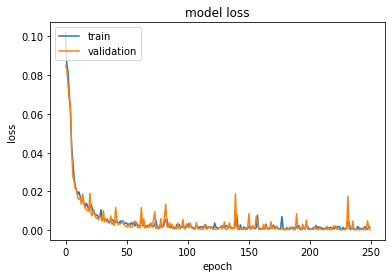

In [13]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
predict_NN = NN.predict(xtest_scale)
predict_NN = scaler_y.inverse_transform(predict_NN)
predict_NN = predict_NN.flatten()
predict_NN

array([0.9891847, 0.9535861, 0.986086 , ..., 0.9952232, 0.9835788,
       0.9712986], dtype=float32)

In [252]:
y_test

array([0.988, 0.952, 0.985, ..., 0.994, 0.982, 0.97 ])

In [15]:
print('mean_absolute_error:', mean_absolute_error(y_test, predict_NN))
print('mean_squared_error: ', mean_squared_error(y_test, predict_NN))

mean_absolute_error: 0.0014116270816820749
mean_squared_error:  2.5148329354204504e-06


mean_absolute_error: 0.0014116270816820749
mean_squared_error:  2.5148329354204504e-06
mean_squared_error:  0.001448729487673661


Text(0.5, 0, 'Error')

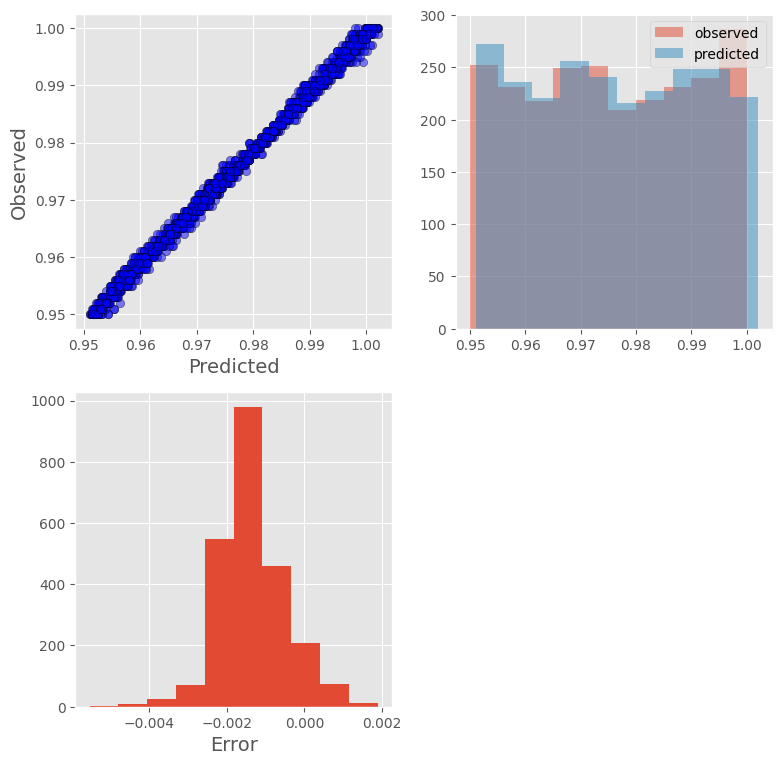

In [16]:
plt.style.use('default')
plt.style.use('ggplot')

#a, b = np.polyfit(predict_NN, y_test,  1)
residual = y_test - predict_NN
print('mean_absolute_error:', mean_absolute_error(y_test, predict_NN))
print('mean_squared_error: ', mean_squared_error(y_test, predict_NN))
print('mean_squared_error: ', mean_absolute_percentage_error(y_test, predict_NN))

plt.figure(figsize=(9,9))
ax = plt.subplot(2,2,1)
ax.scatter(predict_NN, y_test, edgecolor='k', facecolor='blue', alpha=0.5)
#ax.plot(predict_NN, a*predict_NN+b)
ax.set_ylabel('Observed', fontsize=14)
ax.set_xlabel('Predicted', fontsize=14)

ax = plt.subplot(2,2,2)
ax.hist(y_test, alpha = 0.5)
ax.hist(predict_NN, alpha = 0.5)
ax.legend(['observed', 'predicted'])

ax = plt.subplot(2,2,3)
ax.hist(residual)
ax.set_xlabel('Error', fontsize=14)